In [1]:
from sklearn.datasets import load_boston

FileNotFoundError: Could not find module 'C:\ProgramData\Anaconda3\lib\site-packages\sklearn\.libs\msvcp140.dll' (or one of its dependencies). Try using the full path with constructor syntax.

In [2]:
boston = load_boston()
boston

NameError: name 'load_boston' is not defined

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
# X 特征数据
boston.data.shape  # 506个样本，13个特征，已经完成数据清洗和标准化

(506, 13)

In [8]:
# y 目标数据
boston.target.shape  # 506个目标值组成的 boston房价数值

(506,)

### 导入数据，构造X特征和y目标

In [9]:
# 获取X y的数据
X = boston.data
y = boston.target

# 注意，一定要保证 X和y 行数相等

In [12]:
from sklearn.decomposition import PCA
pca = PCA(2)  # 创建一个PCA评估期

X2d = pca.fit_transform(X)  # 将原来的13维特征，降为2维特征

X2d

array([[-119.81884272,   -5.56005586],
       [-168.89015548,   10.11620863],
       [-169.31170747,   14.0805323 ],
       ...,
       [-138.38716306,    0.9380922 ],
       [-137.50517338,    4.2518251 ],
       [-139.19033295,    1.00906423]])

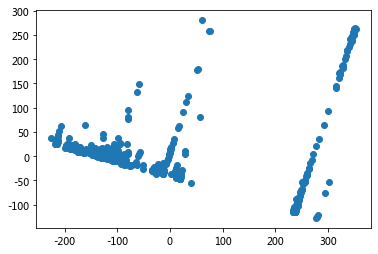

In [13]:
import matplotlib.pyplot as plt
plt.scatter(x=X2d[:,0],y=X2d[:,1])

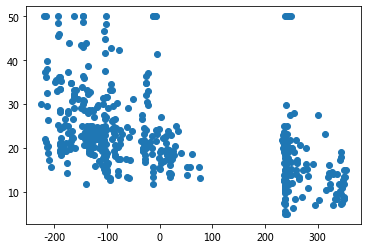

In [14]:
plt.scatter(x=X2d[:,0],y=y)

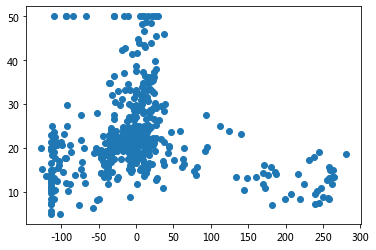

In [15]:
plt.scatter(x=X2d[:,1],y=y)

### 将X,y拆分成X_train,X_test,y_train,y_test

In [16]:
from sklearn.model_selection import train_test_split  # 数据集划分——训练集-测试集

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                 train_size=0.8,  # 训练集占80%，测试集20%
                 random_state=1,  # 随机种子，相同的随机种子会得到相同的随机分布
                ) 

In [19]:
X_train.shape  # 404条13个特征维度

(404, 13)

In [20]:
X_test.shape  # 102条13个特征维度

(102, 13)

In [21]:
y_train.shape  # 404个目标值

(404,)

In [22]:
y_test.shape   # 102个目标值

(102,)

### 选择一个算法模型，构造分类器或者回归器

In [23]:
# boston房价回归分析，通过房子的13个特征属性，来回归计算房价的数值
from sklearn.linear_model import LinearRegression,SGDRegressor  # 通过矩阵计算求回归方程的解析解的方法

LR = LinearRegression()
SGD = SGDRegressor()





### 使用分类器或者回归器来训练

In [24]:
LR.fit(X_train,y_train)  # 使用训练集的特征和目标来学习，来拟合模型，来训练

LinearRegression()

### 使用模型预测

In [25]:
y_pred = LR.predict(X_test) # 预测只使用 特征数据，得到预测值  # 学生的答卷

In [26]:
y_test   # 老师的参考答案

array([28.2, 23.9, 16.6, 22. , 20.8, 23. , 27.9, 14.5, 21.5, 22.6, 23.7,
       31.2, 19.3, 19.4, 19.4, 27.9, 13.9, 50. , 24.1, 14.6, 16.2, 15.6,
       23.8, 25. , 23.5,  8.3, 13.5, 17.5, 43.1, 11.5, 24.1, 18.5, 50. ,
       12.6, 19.8, 24.5, 14.9, 36.2, 11.9, 19.1, 22.6, 20.7, 30.1, 13.3,
       14.6,  8.4, 50. , 12.7, 25. , 18.6, 29.8, 22.2, 28.7, 23.8,  8.1,
       22.2,  6.3, 22.1, 17.5, 48.3, 16.7, 26.6,  8.5, 14.5, 23.7, 37.2,
       41.7, 16.5, 21.7, 22.7, 23. , 10.5, 21.9, 21. , 20.4, 21.8, 50. ,
       22. , 23.3, 37.3, 18. , 19.2, 34.9, 13.4, 22.9, 22.5, 13. , 24.6,
       18.3, 18.1, 23.9, 50. , 13.6, 22.9, 10.9, 18.9, 22.4, 22.9, 44.8,
       21.7, 10.2, 15.4])

### 使用y_test,y_pred来评估模型的效率

In [30]:
from sklearn.metrics import mean_squared_error,r2_score
# 均方误差
mse = mean_squared_error(y_test,y_pred) # 越低越好
print("MSE: ",mse)
r2s = r2_score(y_test,y_pred)
print("R2: ",r2s)

# r2score
print("SCore: ",LR.score(X_test,y_test))  # 0-1的值，越接近1，越好

MSE:  23.38083648027025
R2:  0.763417443213847
SCore:  0.763417443213847
